In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import pynbody
os.environ['TANGOS_DB_CONNECTION'] = '/home/bk639/data_base/Merians_test.db'
#this locks the database, so kill the kernel to unlock
import tangos 
#once  tangos is loaded force a reload 
import importlib
importlib.reload(tangos)

<module 'tangos' from '/home/bk639/miniconda3/envs/shapes/lib/python3.12/site-packages/tangos/__init__.py'>

In [2]:
#tangos.all_simulations()
r615 = tangos.get_simulation('r615.romulus25.3072g1HsbBH')
r761 = tangos.get_simulation('r761.romulus25.3072g1HsbBH')
r613 = tangos.get_simulation('r613.romulus25.3072g1HsbBH')
r918 = tangos.get_simulation('r918.romulus25.3072g1HsbBH')

print(r615.timesteps[-1].extension)

r615.romulus25.3072g1HsbBH.004096/r615.romulus25.3072g1HsbBH.004096


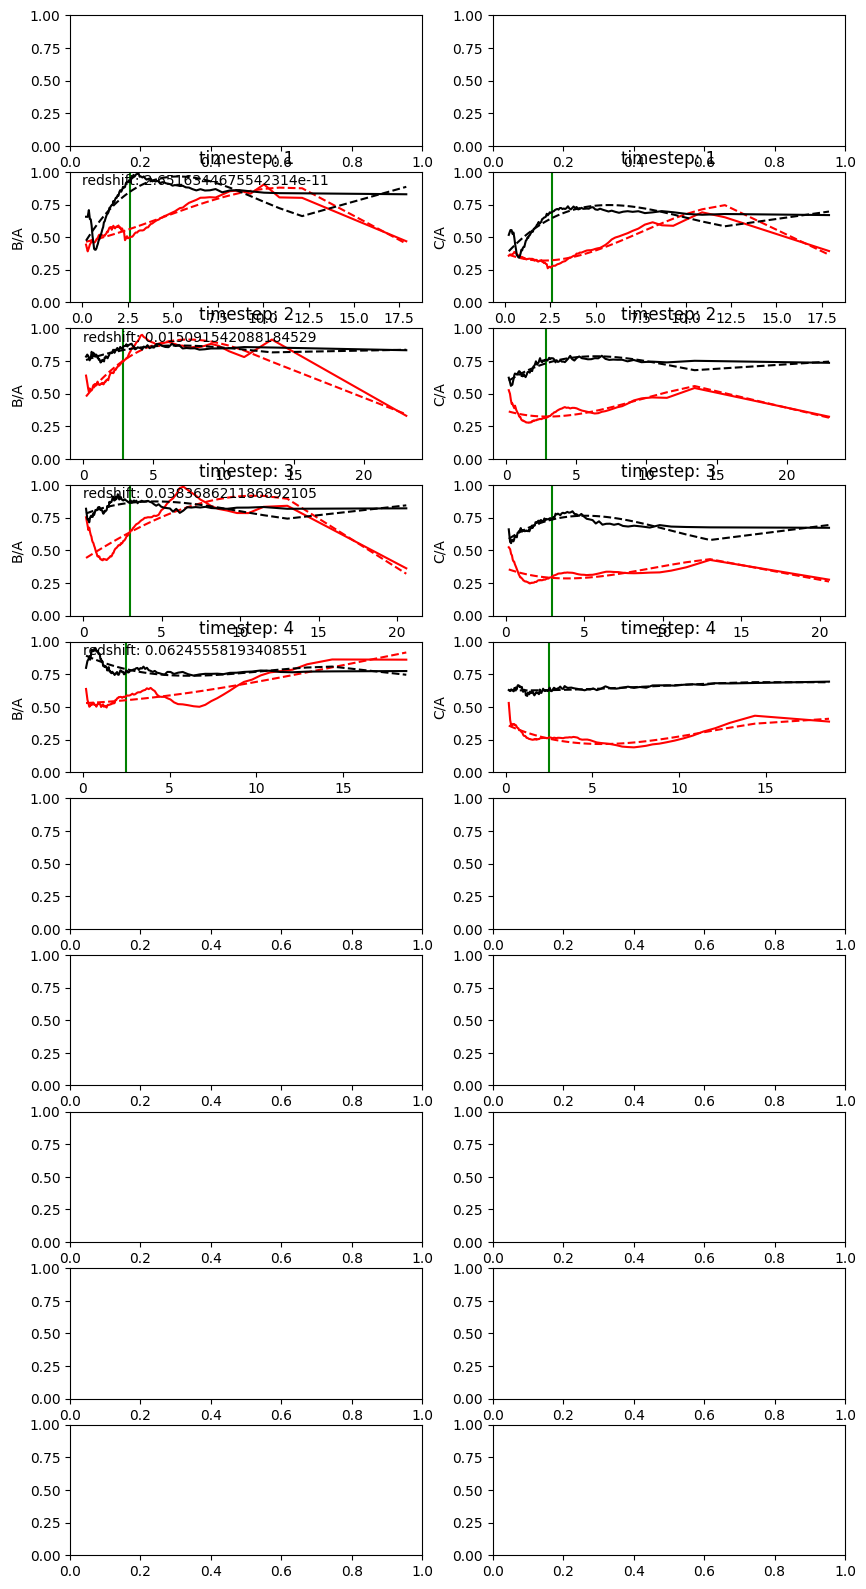

In [6]:
#plot r615 halo 1 rbins vs ba_s and ba_s_smoothed

import matplotlib.pyplot as plt
#make 2 columns for ba and ca and 10 rows for each timestep
fig, ax = plt.subplots(10, 2, figsize=(10, 20))
#switch to column major order
ax = ax.T
for i in range(10):
    try:
        halo = r615.timesteps[-i].halos[1]
        rbins = halo['rbins']
        ba_s = halo['ba_s']
        ba_s_smoothed = halo['ba_s_smoothed']
        ba_d = halo['ba_d']
        ba_d_smoothed = halo['ba_d_smoothed']
        reff = halo['reff']
        ax[0, i].vlines(reff, 0, 1, color='g', label='reff')
        ax[0, i].plot(rbins, ba_s, label='Stellar B/A', color='r')
        ax[0, i].plot(rbins, ba_s_smoothed, , color='r', linestyle='--') 
        ax[0, i].plot(rbins, ba_d, label='Dark B/A', color='k')
        ax[0, i].plot(rbins, ba_d_smoothed, label='Smoothed', color='k', linestyle='--')

        ax[0, i].set_xlabel('r(kpc)')
        ax[0, i].set_ylabel('B/A')
        ax[0, i].set_ylim(0, 1)
        
        #label each row with redshift
        ax[0, i].text(0, 0.9, f'redshift: {r615.timesteps[-i].redshift}:.2f')
        
        ca_s = halo['ca_s']
        ca_s_smoothed = halo['ca_s_smoothed']
        ca_d = halo['ca_d']
        ca_d_smoothed = halo['ca_d_smoothed']
        reff = halo['reff']
        ax[1, i].vlines(reff, 0, 1, color='g', label='reff')
        ax[1, i].plot(rbins, ca_s, label='ca_s', color='r')
        ax[1, i].plot(rbins, ca_s_smoothed, label='ca_d_smoothed', color='r', linestyle='--')
        ax[1, i].plot(rbins, ca_d, label='ca_s', color='k')
        ax[1, i].plot(rbins, ca_d_smoothed, label='ca_d_smoothed', color='k', linestyle='--')
        ax[1, i].set_title('timestep: {}'.format(i))
        ax[1, i].set_xlabel('r(kpc)')
        ax[1, i].set_ylabel('C/A')
        ax[1, i].set_ylim(0, 1)
    except:
        continue
    
    



In [26]:
#idenitfy mergers in last 10 timesteps
from tangos.examples.mergers import get_mergers_of_major_progenitor, most_major_mergers_since
redshifts,ratios,db_halo = get_mergers_of_major_progenitor(r615.timesteps[-1].halos[1])

In [27]:
print(ratios)

[ 2.13334978  2.84506789  3.191626    5.34103827  7.95817708  6.32247182
  6.52112247  0.15432845  0.17029487 11.80033647  1.28675128 18.29055574
  5.33676323  6.30205707  7.0561223   4.07781677 11.03410367  3.03508362
  3.01634999  3.91648695  8.44233432  2.61577017 10.587333   12.41845618]


TypeError: only integer scalar arrays can be converted to a scalar index

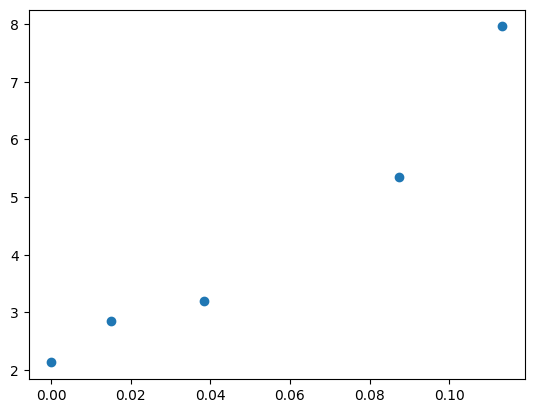

In [40]:
mask = redshifts < .3
plt.scatter(redshifts[mask], ratios[mask])
print(db_halo[mask])

In [ ]:
#plot ba_s vs ca_s before and after merger in different colors


In [51]:
#make b/a vs c/a plot for each halo, showing a track of the last 10 timesteps
from matplotlib import cm
def plot_ba_ca_track(simulation,mergers):
    ba_d = []
    ba_s = []
    ca_d = []
    ca_s = []
    redshifts = []
    
    n = 10
    for i in range(1,n+1):
        try:
            print(i)
            halo = simulation.timesteps[-i].halos[1]
            ba_d.append(halo['ba_d_at_reff'])
            ba_s.append(halo['ba_s_at_reff'])
            ca_d.append(halo['ca_d_at_reff'])
            ca_s.append(halo['ca_s_at_reff'])
            
            
        except:
            ba_d.append(np.nan)
            ba_s.append(np.nan)
            ca_d.append(np.nan)
            ca_s.append(np.nan)
        redshifts.append(r615.timesteps[-i].redshift)

    #! plot mergers with black color from approx redshifts using np.close atol = 0.1


    
    
    #gradient color by redshift
    fig, ax = plt.subplots()

                
    #make colormap for redshifts
    #2 colors for colormap
    colors = cm.winter(np.linspace(0,1,n))
    for i in range(n):
        ax.scatter(ca_s[i],ba_s[i],color=colors[i],marker='*')
        ax.scatter(ca_d[i],ba_d[i],color=colors[i],marker='o')

    for merger in mergers:
        for i in range(n):
            if np.isclose(redshifts[i],merger,rtol=.01):
                print('merger at redshift: ',redshifts[i])
                ax.scatter(ca_s[i],ba_s[i],color=colors[i],label='merger',marker='*',s=100)
                ax.scatter(ca_d[i],ba_d[i],color=colors[i],label='merger',marker='o',s=100)
                print(ba_d[i],ba_s[i],ca_d[i],ca_s[i])
                
    ax.plot(ca_s,ba_s)
    ax.plot(ca_d,ba_d)
    ax.set_xlabel('C/A')
    ax.set_ylabel('B/A')
    ax.set_title('B/A vs C/A')
    ax.legend()
    #set limits from 0 to 1 for both axes
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_aspect('equal')
    plt.show()
    


1
2
3
4
5
merger at redshift:  2.6516344675542314e-11
0.8453621546098106 0.5615480437023205 0.6470986359680666 0.323247805662277


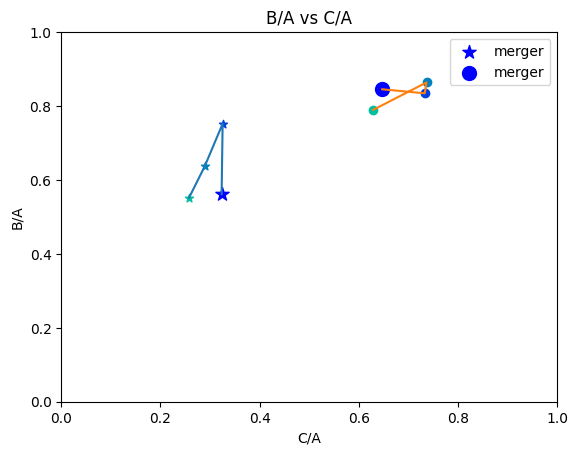

In [52]:
mergers_approx_redshift =[0.0,0.9]
plot_ba_ca_track(r615,mergers_approx_redshift)
